In [ ]:
# USING XGBOOST AND RANDOM FOREST

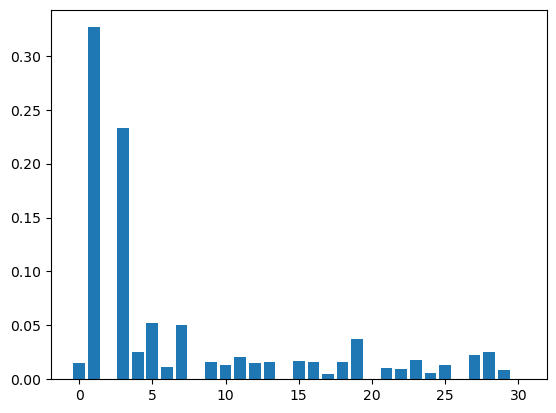

(195, 16) (49, 16) (195,) (49,)
Accuracy: 0.9183673469387755
Confusion Matrix:
[[11  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  1  8  0]
 [ 1  0  0  2 16]]
Classification Report:
              precision    recall  f1-score   support

     Class 1       0.92      1.00      0.96        11
     Class 2       1.00      1.00      1.00         5
     Class 3       0.83      1.00      0.91         5
     Class 4       0.80      0.89      0.84         9
     Class 5       1.00      0.84      0.91        19

    accuracy                           0.92        49
   macro avg       0.91      0.95      0.92        49
weighted avg       0.93      0.92      0.92        49



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Data
data = pd.read_csv('C:/Users/sansk/OneDrive/Desktop/CapstoneCombine/extracted_1.csv')  # Replace with your dataset file

# Extract the class column
y = data.iloc[:, -1]  # Last column is the class column

# Encode class labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Drop the name columns (first two columns)
X = data.iloc[:, 2:-1]  # Exclude the first two columns and the last column

# Step 2: Preprocess Categorical Features (if any)
# If you have categorical features, one-hot encode them
#categorical_cols = ['categorical_column1', 'categorical_column2']  # Replace with your categorical column names
#X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 3: Impute Missing Values (if any)
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy if needed
#X = imputer.fit_transform(X)

# Step 4: Feature Selection using XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X, y)

# Visualize feature importance (optional)
importance = xgb_model.feature_importances_
plt.bar(range(len(importance)), importance)
plt.show()

# Step 5: Select Important Features
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(xgb_model, threshold='median')  # You can adjust the threshold as needed
selector.fit(X, y)
X_selected = selector.transform(X)

# Step 6: Use Random Forest as the Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=700, random_state=42)

# Step 7: Perform Classification using Random Forest and Selected Features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Ensure that X_train, X_test, y_train, and y_test have consistent shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

random_forest_classifier.fit(X_train, y_train)

predictions = random_forest_classifier.predict(X_test)

# Step 8: Evaluate the Classifier and Create a Confusion Matrix
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


In [3]:
print(X_selected)

[[32.09437498 31.989       0.69460817 ... 30.859      32.402
   0.5706292 ]
 [32.47094756 32.437       0.72739804 ... 31.357      33.048
   0.66598122]
 [26.33325125 26.386       1.33713683 ... 24.938      26.526
   1.45445436]
 ...
 [33.46878188 33.471       0.7776948  ... 29.944      33.7995
   0.87717796]
 [25.81608724 25.884       1.13381216 ... 24.715      26.673
   0.66006814]
 [26.17571399 26.081       1.38106149 ... 24.548      27.701
   1.13629866]]


In [7]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = predictions.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

,Predicted Labels,Actual Labels
0,0,0
1,3,3
2,4,4
3,3,3
4,3,3
5,3,3
6,4,4
7,4,4
8,0,0
9,1,1


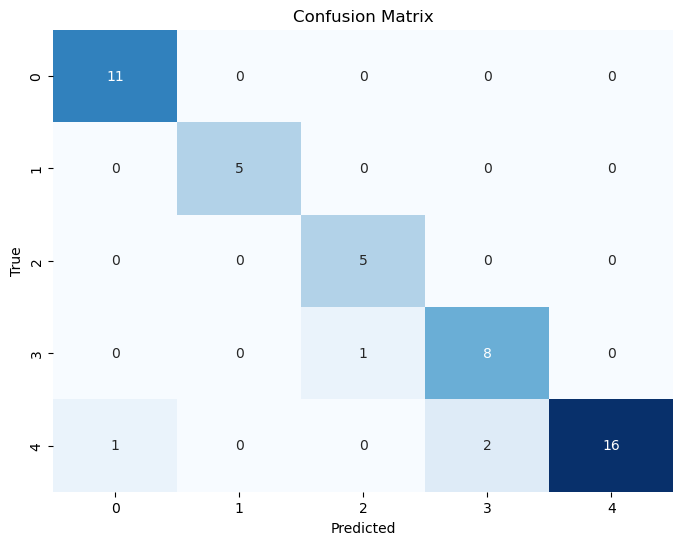

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.92      1.00      0.96        11
     Class 2       1.00      1.00      1.00         5
     Class 3       0.83      1.00      0.91         5
     Class 4       0.80      0.89      0.84         9
     Class 5       1.00      0.84      0.91        19

    accuracy                           0.92        49
   macro avg       0.91      0.95      0.92        49
weighted avg       0.93      0.92      0.92        49



In [4]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

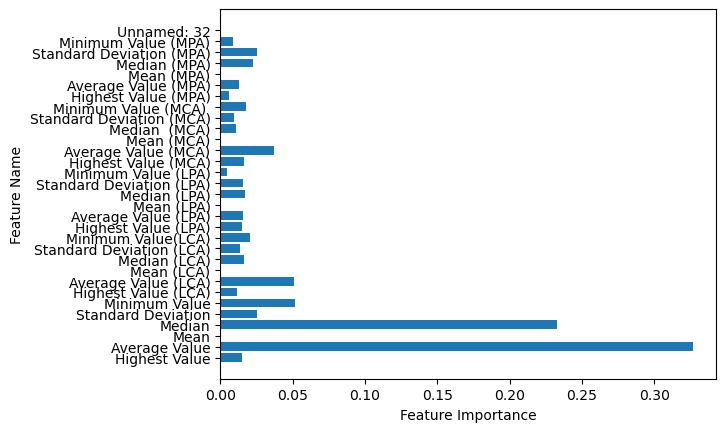

In [2]:
importance = xgb_model.feature_importances_
feature_names = X.columns  # Get the feature names
plt.barh(feature_names, importance)  # Horizontal bar chart with feature names
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9183673469387755
Precision: 0.9275510204081633
Recall: 0.9183673469387755
F1-Score: 0.9187259105252847
